In [1]:
import numpy as np
import pandas as pd
import sys
import os
import copy
from time import process_time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.patches import Ellipse, Circle
from EpiClockInvasiveBRCA.src.consts import consts
import simulation_array as sim

In [2]:
figure_outdir = 'figures'
if not os.path.exists(figure_outdir):
    os.mkdir(figure_outdir)

In [3]:
FLIP_RATE = 0.004
GROWTH_RATE = 0.16
DEATH_RATE = 0.14

In [4]:
# scale factor
sf = 0.4

figsize = np.array([7, 6])
labelfontsize = 25
ticksfontsize = 18
opacity = 0.8
linewidth = 1

color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]
sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

In [5]:
init_params = {'n_cells':1,
               'flip_rate':FLIP_RATE, # flip rate per cell division per allele
               'growth_rate':GROWTH_RATE, # cell divisions per day
               'death_rate':DEATH_RATE, # cell deaths per day,
               'init_site_state_counts':[1, 1, 0, 1],
              }

In [14]:
seed = 0
gen = np.random.default_rng(seed)

ens = sim.Ensemble(init_params, gen)

allocated


In [15]:
time_list = []

before_total = process_time()

for i in range(600):
    
    before = process_time()
    ens.passDay()
    after = process_time()
    
    time_list.append(after - before)
    
after_total = process_time()

print(f'Total time: {after_total - before_total}')


died
1
1


died
1
1


died
2
2


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
2
2


died
1
1


died
2
2


died
1
1


died
2
2


died
1
1


died
1
1


died
2
2


died
1
1


died
1
1


died
1
1


died
2
2


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
1
1


died
2
2

Total time: 0.05762300000000131


In [10]:
ens.time_obj

{'a': 0.048109000000026825,
 'b': 0.010526999999994402,
 'c': 0.11923500000002996,
 'd': 0.0169979999999903}

In [19]:
self = ens
meth_alleles = np.ceil(self.state_arr[self.living_cells] / 2)

In [20]:
meth_alleles

array([[1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.]])

In [18]:
ens.state_arr.shape

(10000000, 3)

In [16]:
ens.getBetaValues()

array([0.5, 1. , 1. ])

<Axes: >

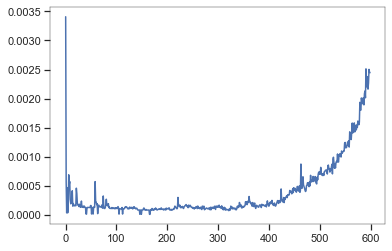

In [8]:
xvals = np.arange(len(time_list))
sns.lineplot(x=xvals, y=time_list)

<Axes: >

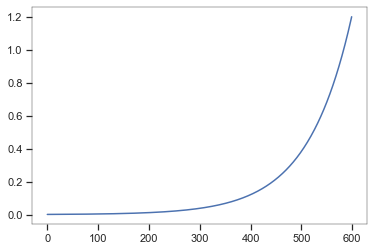

In [266]:
a = 0.0012
b = 1.0116
yvals = a*(b**xvals)

sns.lineplot(x=xvals, y=yvals)

(-0.1, 2.1)

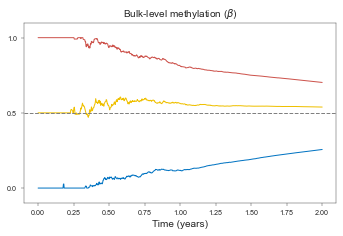

In [14]:
figsize = np.array([14, 8.3])

beta_arr = np.loadtxt(os.path.join('three_sites', 'beta_values.txt'), delimiter='\t', dtype=float)

plot_data = pd.melt(pd.DataFrame(beta_arr).reset_index(), ['index'])
plot_data['Year'] = plot_data['index'] / 365
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

fig, ax = plt.subplots(figsize=figsize * sf)

plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable',
                    palette=color_list, linestyle='solid', linewidth=2.5 * sf)

xlim = (-0.1, plot_data['Year'].max() + 0.1)

ax.set_ylim((-0.1, 1.1))
ax.set_yticks([0, 0.5, 1])
ax.set_title('Bulk-level methylation ($β$)', fontsize=labelfontsize * sf)
ax.set_ylabel('')
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.legend('', frameon=False)

line_x = np.linspace(xlim[0], xlim[1], 100)
line_y = [0.5] * 100
ax.plot(line_x, line_y, color="grey", linestyle='dashed', linewidth=1.0)

ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

ax.set_xlim(xlim)

# fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites.pdf'), format='pdf', pad_inches=0.1)

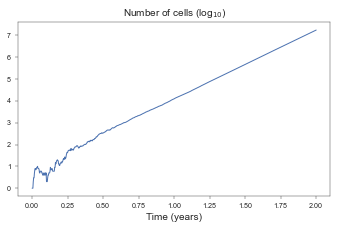

In [15]:
n_cells_list = np.loadtxt(os.path.join('three_sites', 'n_cells.txt'), dtype=int)

figsize = np.array([14, 8])

plot_data = pd.DataFrame(data=np.log10(n_cells_list), columns=['log10_n_cells'])
plot_data['Year'] = plot_data.index / 365
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]


fig, ax = plt.subplots(figsize=figsize * sf)

plot = sns.lineplot(ax=ax, x='Year', y='log10_n_cells', data=plot_data,
                    linestyle='solid', linewidth=2.5 * sf)

xlim = (-0.1, plot_data['Year'].max() + 0.1)

ax.set_title('Number of cells (log$_{10}$)', fontsize=labelfontsize * sf)
ax.set_ylabel('')
# ax.yaxis.set_label_coords(0.0, 1.07)
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.legend('', frameon=False)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

ax.set_xlim(xlim)

fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites_n_cells.pdf'), format='pdf', pad_inches=0.1)